## Estimate clustering performance by Adjust Rand Index (ARI)

Wiki: https://en.wikipedia.org/wiki/Rand_index

The Rand index or Rand measure (named after William M. Rand) in statistics, and in particular in data clustering, is a measure of the similarity between two data clusterings. A form of the Rand index may be defined that is adjusted for the chance grouping of elements, this is the adjusted Rand index. From a mathematical standpoint, Rand index is related to the accuracy, but is applicable even when class labels are not used.

This notebook shows the ARI calculated based on the fly dataset.

Although Leiden and Louvain have better performance in the fly dataset, in noisy situations (e.g., simulated dataset with random noise), HDBSCAN is better. (see `Simulation_TFs.ipynb`)

In [1]:
from sklearn import metrics
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
df = pd.read_csv("ARI_input.csv") # this input is identical to the SourceData Table for clustering.

In [3]:
df

,Sites (BDGP5.78),Priori Knowledge,UMAP-1,UMAP-2,K-Means,GMM,Agglomerative (complete),Agglomerative (ward),BIRCH,Spectral Clustering,Louvain,Leiden,OPTICS,DBSCAN,HDBSCAN,HDBSCAN (soft clustering)
0,2L@10007123@+,Type I,8.851309,7.063726,1,1,1,0,0,0,0,0,0,0,1,1
1,2L@10038800@+,Type I,7.533755,5.765711,1,0,1,0,0,0,0,0,0,0,1,1
2,2L@10058004@+,Type I,6.953392,9.977392,0,1,0,1,1,0,0,0,0,0,1,1
3,2L@101153@+,Type I,6.194741,8.500028,0,0,0,1,1,0,0,0,0,0,1,1
4,2L@1015176@-,Type I,10.007834,6.847593,1,1,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8397,XHet@68785@-,Type I,6.347565,6.687779,0,0,1,0,0,0,0,0,0,0,1,1
8398,XHet@68786@-,Type I,6.927502,9.016670,0,0,0,1,1,0,0,0,0,0,1,1
8399,XHet@77281@+,Type I,8.209063,7.272699,1,0,1,0,0,0,0,0,0,0,1,1
8400,YHet@328017@-,Type I,5.922921,9.501617,0,0,0,1,1,0,0,0,0,0,1,1


In [4]:
df["label"] = 0
df.loc[df["Priori Knowledge"] == "Type II", "label"] = 1

In [5]:
df

,Sites (BDGP5.78),Priori Knowledge,UMAP-1,UMAP-2,K-Means,GMM,Agglomerative (complete),Agglomerative (ward),BIRCH,Spectral Clustering,Louvain,Leiden,OPTICS,DBSCAN,HDBSCAN,HDBSCAN (soft clustering),label
0,2L@10007123@+,Type I,8.851309,7.063726,1,1,1,0,0,0,0,0,0,0,1,1,0
1,2L@10038800@+,Type I,7.533755,5.765711,1,0,1,0,0,0,0,0,0,0,1,1,0
2,2L@10058004@+,Type I,6.953392,9.977392,0,1,0,1,1,0,0,0,0,0,1,1,0
3,2L@101153@+,Type I,6.194741,8.500028,0,0,0,1,1,0,0,0,0,0,1,1,0
4,2L@1015176@-,Type I,10.007834,6.847593,1,1,1,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8397,XHet@68785@-,Type I,6.347565,6.687779,0,0,1,0,0,0,0,0,0,0,1,1,0
8398,XHet@68786@-,Type I,6.927502,9.016670,0,0,0,1,1,0,0,0,0,0,1,1,0
8399,XHet@77281@+,Type I,8.209063,7.272699,1,0,1,0,0,0,0,0,0,0,1,1,0
8400,YHet@328017@-,Type I,5.922921,9.501617,0,0,0,1,1,0,0,0,0,0,1,1,0


In [6]:
output = {}
output["ARI"] = {}
output["Method"] = {}
N = 0
def cal_ARI(df, name):
    global N
    exp_values = df["label"]
    pred_values = df[name]
    ARI = metrics.adjusted_rand_score(exp_values, pred_values)
    print(name, ARI)
    N += 1
    output["Method"][N] = name
    output["ARI"][N] = ARI
    return name, ARI

In [7]:
res = []
res.append(cal_ARI(df, "K-Means"))
res.append(cal_ARI(df, "GMM"))
res.append(cal_ARI(df, "Agglomerative (complete)"))
res.append(cal_ARI(df, "Agglomerative (ward)"))
res.append(cal_ARI(df, "BIRCH"))
res.append(cal_ARI(df, "Spectral Clustering"))
res.append(cal_ARI(df, "Louvain"))
res.append(cal_ARI(df, "Leiden"))
res.append(cal_ARI(df, "OPTICS"))
res.append(cal_ARI(df, "DBSCAN"))
res.append(cal_ARI(df, "HDBSCAN (soft clustering)"))


K-Means 0.10354001415924673
GMM 0.003950218263186734
Agglomerative (complete) 0.09460747948104306
Agglomerative (ward) 0.1503549799511198
BIRCH 0.2124101170532416
Spectral Clustering 0.9021017657071848
Louvain 0.9203868984524209
Leiden 0.9203868984524209
OPTICS 0.857620657263425
DBSCAN 0.8748472563884715
HDBSCAN (soft clustering) 0.8821297074373873


In [8]:
df2 = pd.DataFrame(output)

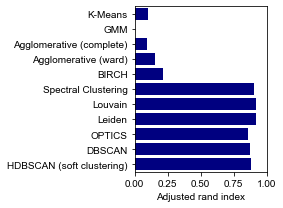

In [9]:
fig, ax = plt.subplots( figsize=(4,3))
_ = sns.barplot(data=df2, y="Method", x="ARI", ax=ax, saturation=1, color="navy", orient="h")
ax.set_ylabel("")
ax.set_xlabel("Adjusted rand index")
ax.set_xlim(0,1)
plt.tight_layout()
plt.savefig("ARI.pdf")